# Analyze and Visualize

In [1]:
import pandas as pd
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

In [3]:
# Summary of the data
twitter_archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,confidence_level
count,2.075000e+03,2075.000000,2075.0,2075.000000,2075.000000,1949.000000
mean,7.367229e+17,10.621205,10.0,2697.898313,8760.451566,0.594207
std,6.729030e+16,2.209416,0.0,4720.282077,12707.455938,0.272281
min,6.660209e+17,0.000000,10.0,11.000000,78.000000,0.044333
25%,6.766970e+17,10.000000,10.0,596.500000,1934.500000,0.362596
50%,7.095662e+17,11.000000,10.0,1308.000000,3983.000000,0.587507
75%,7.881644e+17,12.000000,10.0,3088.000000,10944.000000,0.846986
max,8.924206e+17,27.000000,10.0,83127.000000,163487.000000,1.000000


In [4]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id              2075 non-null int64
timestamp             2075 non-null object
text                  2075 non-null object
rating_numerator      2075 non-null int64
rating_denominator    2075 non-null int64
name                  1383 non-null object
breed                 336 non-null object
retweet_count         2075 non-null int64
favorite_count        2075 non-null int64
image_url             1949 non-null object
prediction            1949 non-null object
confidence_level      1949 non-null float64
dtypes: float64(1), int64(5), object(6)
memory usage: 194.6+ KB


In [5]:
twitter_archive_master.head(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,breed,retweet_count,favorite_count,image_url,prediction,confidence_level
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,8257,37848,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,6101,32523,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,4039,24483,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,8400,41202,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,9106,39378,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712


In [6]:
# generate correlation table
twitter_archive_master.corr()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,confidence_level
tweet_id,1.000000,0.511789,NaN,0.382832,0.612645,0.104896
rating_numerator,0.511789,1.000000,NaN,0.289848,0.376777,0.100558
rating_denominator,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,0.382832,0.289848,NaN,1.000000,0.926728,0.052205
favorite_count,0.612645,0.376777,NaN,0.926728,1.000000,0.075395
confidence_level,0.104896,0.100558,NaN,0.052205,0.075395,1.000000


##### There is a strong correlation between retweets counts and favourite count

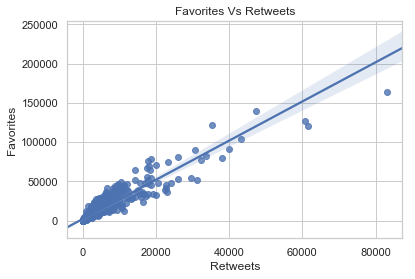

In [7]:
ax = sns.regplot(x=twitter_archive_master.retweet_count, y=twitter_archive_master.favorite_count)
plt.title("Favorites Vs Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.show()

In [8]:
twitter_archive_master.breed.value_counts()

pupper           221
doggo             72
puppo             23
floofer            9
doggo,pupper       9
doggo,floofer      1
doggo,puppo        1
Name: breed, dtype: int64

#### Pupper has the most number of tweets in our data set

In [9]:
# Lets group by breed to get the total number of retweets and favorites by breed
twitter_retweets_by_breed = twitter_archive_master.groupby(['breed'],as_index=False).agg({'retweet_count': np.sum, 'favorite_count': np.sum})
twitter_retweets_by_breed

,breed,retweet_count,favorite_count
0,doggo,467729,1336047
1,"doggo,floofer",3249,16469
2,"doggo,pupper",37056,117088
3,"doggo,puppo",18166,45990
4,floofer,35054,95063
5,pupper,518734,1548702
6,puppo,146081,498461


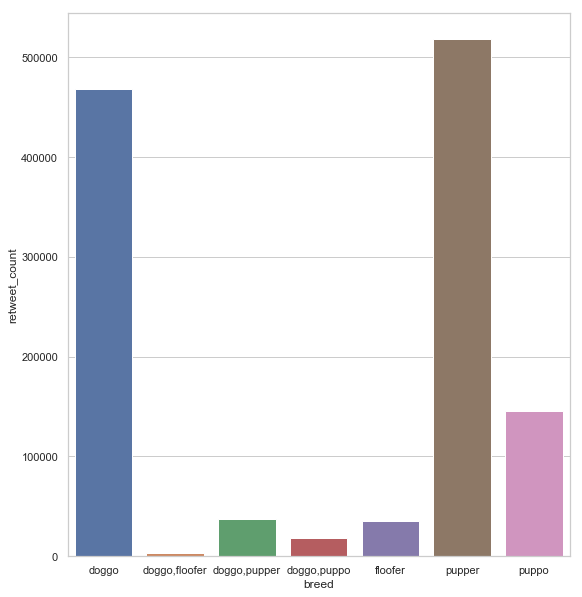

In [26]:
plt.figure(figsize=(9,10))
ax = sns.barplot(x="breed", y="retweet_count", data=twitter_retweets_by_breed)

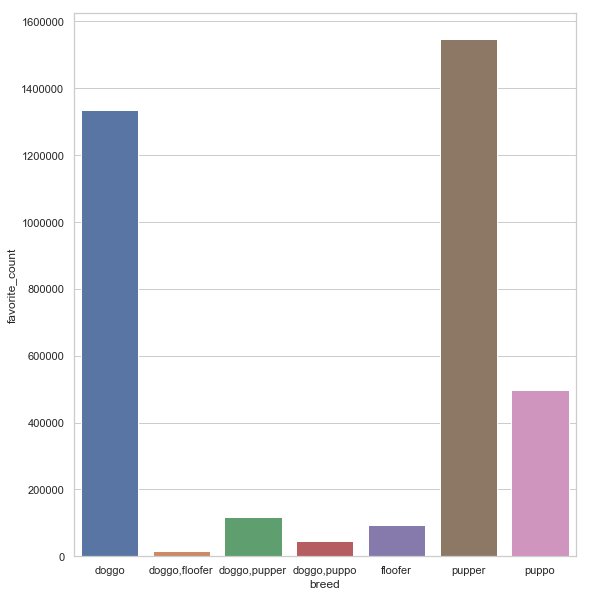

In [27]:
plt.figure(figsize=(9,10))
ax = sns.barplot(x="breed", y="favorite_count", data=twitter_retweets_by_breed)

#### Pupper and Doggo are the ones that have the most retweets and favorite counts

In [18]:
# lets calculate another column called ratings using ratings numerator and ratings denominator

twitter_archive_master['ratings'] = twitter_archive_master['rating_numerator']/twitter_archive_master['rating_denominator']

In [19]:
twitter_archive_master[['rating_numerator','rating_denominator','ratings']].head(10)

,rating_numerator,rating_denominator,ratings
0,13,10,1.3
1,13,10,1.3
2,12,10,1.2
3,13,10,1.3
4,12,10,1.2
5,13,10,1.3
6,13,10,1.3
7,13,10,1.3
8,13,10,1.3
9,14,10,1.4


In [20]:
# Now lets calculate the max ratings value by breed
twitter_archive_master.groupby(['breed'],as_index=False).agg({'ratings': np.max})


,breed,ratings
0,doggo,1.4
1,"doggo,floofer",1.1
2,"doggo,pupper",1.3
3,"doggo,puppo",1.3
4,floofer,1.3
5,pupper,2.7
6,puppo,1.4


##### Pupper has the max rating value of 2.7

In [21]:
# Now lets calculate the min ratings value by breed
twitter_archive_master.groupby(['breed'],as_index=False).agg({'ratings': np.min})



,breed,ratings
0,doggo,0.8
1,"doggo,floofer",1.1
2,"doggo,pupper",0.5
3,"doggo,puppo",1.3
4,floofer,1.0
5,pupper,0.3
6,puppo,0.9


#### Pupper also has the min rating of 0.3

In [22]:
# Now lets calculate the mean ratings value by breed
twitter_archive_master.groupby(['breed'],as_index=False).agg({'ratings': np.mean})



,breed,ratings
0,doggo,1.184722
1,"doggo,floofer",1.100000
2,"doggo,pupper",1.111111
3,"doggo,puppo",1.300000
4,floofer,1.188889
5,pupper,1.080543
6,puppo,1.200000


##### Floofer has highest mean rating of  1.18

In [24]:
# Lets look at the data of the dog that received the max rating of 2.7
max_rated_tweet = twitter_archive_master.query('ratings == 2.7')
max_rated_tweet

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,breed,retweet_count,favorite_count,image_url,prediction,confidence_level,ratings
583,778027034220126208,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,Sophie,pupper,1758,6943,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,clumber,0.946718,2.7


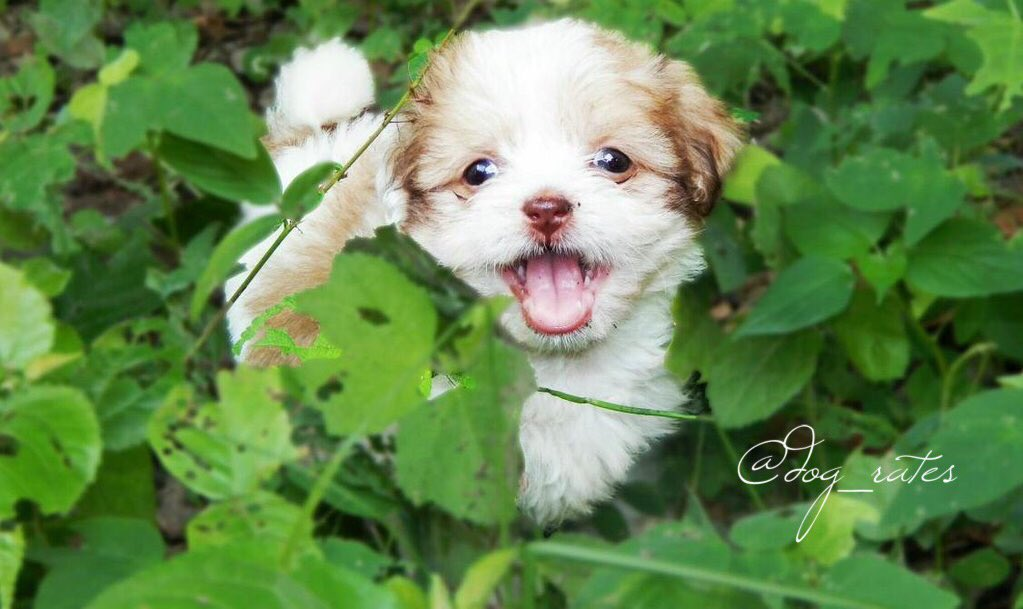

In [25]:
from IPython.display import Image
>>> image = Image('https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg')
>>> image

##### This is the most rated pupper... Awwww